In [1]:
from time import time
import xarray as xr

In [2]:


def _get_year_month(product, tif):
    fn = tif.split('/')[-1]
    fn = fn.replace(product,'')
    fn = fn.replace('.tif','')
    print(fn)
    fn=fn[-3:]
    return fn

In [3]:

def xr_build_cube_concat_ds(tif_list, product):

    start = time()
    my_da_list =[]
    year_month_list = []
    for tif in tif_list:
        tiffile = tif
        #print(tiffile)
        da = xr.open_rasterio(tiffile)
        my_da_list.append(da)
        tnow = time()
        elapsed = tnow - start
        #print(tif, elapsed)
        print('.',flush=True)
        year_month_list.append(_get_year_month(product, tif))

    da = xr.concat(my_da_list, dim='band')
    da = da.rename({'band':'day'})
    da = da.assign_coords(day=year_month_list)
    DS = da.to_dataset(name=product)
    return(DS)

In [4]:
! aws s3 ls dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/


2020-10-01 07:10:48      35692 Tasavg_1950001.tif
2020-10-01 07:10:49      35692 Tasavg_1950002.tif
2020-10-01 07:10:50      35692 Tasavg_1950003.tif
2020-10-01 07:10:51      35692 Tasavg_1950004.tif
2020-10-01 07:10:52      35692 Tasavg_1950005.tif
2020-10-01 07:10:53      35692 Tasavg_1950006.tif
2020-10-01 07:10:54      35692 Tasavg_1950007.tif
2020-10-01 07:10:54      35692 Tasavg_1950008.tif
2020-10-01 07:10:55      35692 Tasavg_1950009.tif
2020-10-01 07:10:56      35692 Tasavg_1950010.tif
2020-10-01 07:10:57      35692 Tasavg_1950011.tif
2020-10-01 07:10:58      35692 Tasavg_1950012.tif
2020-10-01 07:10:59      35692 Tasavg_1950013.tif
2020-10-01 07:10:59      35692 Tasavg_1950014.tif
2020-10-01 07:11:00      35692 Tasavg_1950015.tif
2020-10-01 07:11:01      35692 Tasavg_1950016.tif
2020-10-01 07:11:02      35692 Tasavg_1950017.tif
2020-10-01 07:11:03      35692 Tasavg_1950018.tif
2020-10-01 07:11:04      35692 Tasavg_1950019.tif
2020-10-01 07:11:05      35692 Tasavg_1950020.tif


In [5]:

def create_s3_list_of_days(main_prefix, year, temperatureType):
    output_name = f'{temperatureType}_'
    the_list = []
    for i in range(1,366):
        day = f'{i:03d}'
        file_object = main_prefix + temperatureType + '/' + str(year) +  '/' + output_name + str(year) + day + '.tif'
        the_list.append(file_object)
    return the_list



In [6]:
main_bucket_prefix='s3://dev-et-data/in/DelawareRiverBasin/Temp/'
year='1950'
temperatureType = 'Tasavg'


In [7]:
tif_list = create_s3_list_of_days(main_bucket_prefix, year, temperatureType)

In [8]:
tif_list

['s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950001.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950002.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950003.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950004.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950005.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950006.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950007.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950008.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950009.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950010.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950011.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950012.tif',
 's3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg

In [9]:
#tif_list_pruned = tif_list[0:364:30]

In [10]:
ds = xr_build_cube_concat_ds(tif_list, temperatureType)

s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950001.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950001.tif 2.4629905223846436
_1950001
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950002.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950002.tif 3.95112943649292
_1950002
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950003.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950003.tif 5.491273403167725
_1950003
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950004.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950004.tif 8.044873237609863
_1950004
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950005.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950005.tif 9.955103397369385
_1950005
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950006.tif
s3://dev-et-data/in/DelawareRiverBasin/T

s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950047.tif 60.66729974746704
_1950047
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950048.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950048.tif 61.60066103935242
_1950048
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950049.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950049.tif 62.71152067184448
_1950049
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950050.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950050.tif 63.60646867752075
_1950050
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950051.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950051.tif 64.787930727005
_1950051
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950052.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950052.tif 65.94433069229126
_1950052
s3://dev-et-dat

s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950094.tif 110.59314799308777
_1950094
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950095.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950095.tif 111.52159667015076
_1950095
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950096.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950096.tif 112.45176672935486
_1950096
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950097.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950097.tif 113.47179460525513
_1950097
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950098.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950098.tif 114.58038282394409
_1950098
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950099.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950099.tif 115.50387287139893
_1950099
s3://de

s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950141.tif 160.95594310760498
_1950141
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950142.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950142.tif 161.90172481536865
_1950142
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950143.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950143.tif 163.0095250606537
_1950143
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950144.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950144.tif 164.08702492713928
_1950144
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950145.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950145.tif 165.02900981903076
_1950145
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950146.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950146.tif 166.0538649559021
_1950146
s3://dev-

s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950188.tif 212.3302080631256
_1950188
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950189.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950189.tif 213.5234751701355
_1950189
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950190.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950190.tif 214.51228308677673
_1950190
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950191.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950191.tif 215.79140639305115
_1950191
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950192.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950192.tif 217.0719187259674
_1950192
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950193.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950193.tif 217.9861216545105
_1950193
s3://dev-et

s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950235.tif 262.0872793197632
_1950235
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950236.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950236.tif 263.2750771045685
_1950236
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950237.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950237.tif 264.26121640205383
_1950237
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950238.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950238.tif 265.3105046749115
_1950238
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950239.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950239.tif 266.57111835479736
_1950239
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950240.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950240.tif 268.59964537620544
_1950240
s3://dev-e

s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950282.tif 313.18546199798584
_1950282
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950283.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950283.tif 314.14365577697754
_1950283
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950284.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950284.tif 315.2311735153198
_1950284
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950285.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950285.tif 316.09293389320374
_1950285
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950286.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950286.tif 316.9137547016144
_1950286
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950287.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950287.tif 317.84203004837036
_1950287
s3://dev-

s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950329.tif 359.672349691391
_1950329
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950330.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950330.tif 360.8919675350189
_1950330
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950331.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950331.tif 361.96516847610474
_1950331
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950332.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950332.tif 362.8812975883484
_1950332
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950333.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950333.tif 363.79024362564087
_1950333
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950334.tif
s3://dev-et-data/in/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950334.tif 364.7152006626129
_1950334
s3://dev-et-

In [11]:
#! aws s3 ls s3://dev-et-data/enduser/DelawareRiverBasin/Temp/Tasavg/1950/Tasavg_1950001.tif

In [12]:
#! aws s3 ls s3://dev-et-data/enduser/DelawareRiverBasin/Temp/

In [13]:
ds

<xarray.Dataset>
Dimensions:  (day: 365, x: 74, y: 119)
Coordinates:
  * day      (day) <U3 '001' '002' '003' '004' '005' ... '362' '363' '364' '365'
  * y        (y) float64 38.1 38.15 38.19 38.23 38.27 ... 42.9 42.94 42.98 43.02
  * x        (x) float64 -76.77 -76.73 -76.69 -76.65 ... -73.81 -73.77 -73.73
Data variables:
    Tasavg   (day, y, x) float32 284.9 284.4 284.2 284.0 ... 274.8 274.9 275.0

In [14]:
dstk=ds.sel(x=-75,y=41, method='nearest')

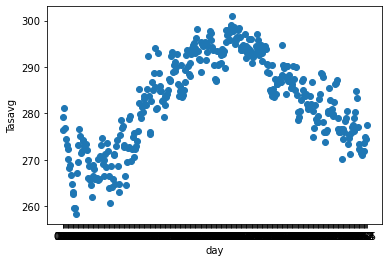

In [15]:
dstk.plot.scatter(x='day', y='Tasavg')

In [16]:
ds.dims

Frozen(SortedKeysDict({'day': 365, 'y': 119, 'x': 74}))

In [17]:
for i in range(0,ds.dims['day']):
    print(ds['Tasavg'][i]['day'])

<xarray.DataArray 'day' ()>
array('001', dtype='<U3')
Coordinates:
    day      <U3 '001'
<xarray.DataArray 'day' ()>
array('002', dtype='<U3')
Coordinates:
    day      <U3 '002'
<xarray.DataArray 'day' ()>
array('003', dtype='<U3')
Coordinates:
    day      <U3 '003'
<xarray.DataArray 'day' ()>
array('004', dtype='<U3')
Coordinates:
    day      <U3 '004'
<xarray.DataArray 'day' ()>
array('005', dtype='<U3')
Coordinates:
    day      <U3 '005'
<xarray.DataArray 'day' ()>
array('006', dtype='<U3')
Coordinates:
    day      <U3 '006'
<xarray.DataArray 'day' ()>
array('007', dtype='<U3')
Coordinates:
    day      <U3 '007'
<xarray.DataArray 'day' ()>
array('008', dtype='<U3')
Coordinates:
    day      <U3 '008'
<xarray.DataArray 'day' ()>
array('009', dtype='<U3')
Coordinates:
    day      <U3 '009'
<xarray.DataArray 'day' ()>
array('010', dtype='<U3')
Coordinates:
    day      <U3 '010'
<xarray.DataArray 'day' ()>
array('011', dtype='<U3')
Coordinates:
    day      <U3 '011'
<xarray.Da

In [18]:
ds = ds - 273.15 # convert data array xarray.DataSet from Kelvin to Celsius

In [19]:
ds

<xarray.Dataset>
Dimensions:  (day: 365, x: 74, y: 119)
Coordinates:
  * day      (day) <U3 '001' '002' '003' '004' '005' ... '362' '363' '364' '365'
  * y        (y) float64 38.1 38.15 38.19 38.23 38.27 ... 42.9 42.94 42.98 43.02
  * x        (x) float64 -76.77 -76.73 -76.69 -76.65 ... -73.81 -73.77 -73.73
Data variables:
    Tasavg   (day, y, x) float32 11.72 11.24 11.03 10.84 ... 1.645 1.721 1.849

In [20]:
dst=ds.sel(x=-75,y=41, method='nearest')

In [21]:
dst

<xarray.Dataset>
Dimensions:  (day: 365)
Coordinates:
  * day      (day) <U3 '001' '002' '003' '004' '005' ... '362' '363' '364' '365'
    y        float64 40.98
    x        float64 -74.98
Data variables:
    Tasavg   (day) float32 6.146 3.225 7.957 3.727 ... -1.169 1.793 1.28 4.441

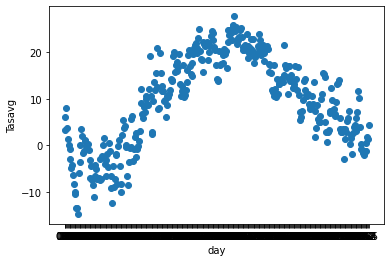

In [22]:
dst.plot.scatter(x='day', y='Tasavg')

In [23]:
dst10=dst.isel(day=slice(0,365,10))

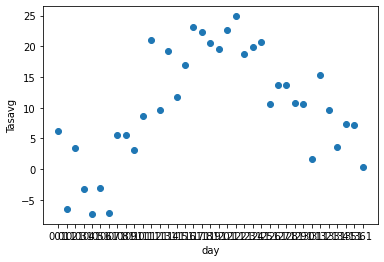

In [24]:
dst10.plot.scatter(x='day', y='Tasavg')

In [25]:
dst30=dst.isel(day=slice(0,365,30))

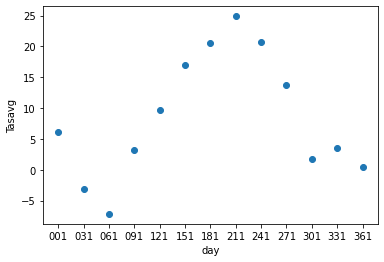

In [26]:
dst30.plot.scatter(x='day', y='Tasavg')

In [33]:
output_main_prefix='s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/'
year='1950'


In [50]:
import rioxarray
def write_out_celsius_tifs(main_prefix, ds, year, output_name):
    num_days=ds.dims['day']
    for i in range(0,num_days):
        dayi = i+1
        day="{:03d}".format(dayi)
        file_object = main_prefix + temperatureType + '/' + str(year) +  '/' + output_name + '_' + str(year) + day + '.tif'
        print(file_object)
        ds.isel(day=dayi).rio.to_raster(file_object)

In [ ]:
write_out_celsius_tifs(output_main_prefix, ds, year, 'Tasavg')

s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950001.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950002.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950003.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950004.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950005.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950006.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950007.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950008.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950009.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950010.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950011.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950012.tif
s3://dev-et-data

s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950101.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950102.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950103.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950104.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950105.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950106.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950107.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950108.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950109.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950110.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950111.tif
s3://dev-et-data/in/DelawareRiverBasin/TempCelsius/Tasavg/1950/Tasavg_1950112.tif
s3://dev-et-data